In [2]:
# Importing required libraries
import pandas as pd                                   
import numpy as np                                    
import keras
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from keras.models import Sequential                   
from keras.layers import Dense, Activation            
from keras.callbacks import History 
from sklearn.metrics import confusion_matrix          
from sklearn import preprocessing
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelBinarizer    
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns                                 
import matplotlib.pyplot as plt                       
%matplotlib inline

np.random.seed(1)  

/Users/paulmathai/.virtualenvs/keras_tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Load dataset from Keras
#KEEP DATA IN THE SAME DIRECTORY ***RELATIVE FILE PATH***
data_np = np.loadtxt("mfcr_train.txt")
data2_np = np.loadtxt("mfcr_test.txt")

In [4]:
(X_train_np, y_train_np), (X_test_np, y_test_np) =(data_np[:, 0:14], data_np[:, 14:40]), (data2_np[:, 0:14], data2_np[:, 14:40])

In [6]:
# Normalize x
X_train_np = X_train_np.astype(float) / np.amax(X_train_np)
X_test_np = X_test_np.astype(float) / np.amax(X_test_np)

# Flatten input: Changing dimension of input images from N*28*28 to N*784
X_train_np = X_train_np.reshape([X_train_np.shape[0], -1])
X_test_np = X_test_np.reshape([X_test_np.shape[0], -1])

# Transforming y using Label Binarizer from Scikit Learn
lb = LabelBinarizer()
y_test1_np =  data2_np[:, 14:40]
y_train_np = lb.fit_transform(y_train_np)
y_test_1_np  = y_test_np
y_test_np = lb.fit_transform(y_test_np)


# Printing dimensions
print("Shape of X_train", X_train_np.shape)
print("Shape of y_train", y_train_np.shape)
print("Shape of X_test", X_test_np.shape)
print("Shape of y_test", y_test_np.shape)
    
# Splitting training data in training and validation data
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 10)

Shape of X_train (78, 14)
Shape of y_train (78, 26)
Shape of X_test (78, 14)
Shape of y_test (78, 26)


In [7]:
X_train_df = pd.DataFrame({'0': X_train_np[:, 0], '1': X_train_np[:, 1],'2': X_train_np[:, 2],'3': X_train_np[:, 3],'4': X_train_np[:, 4],'5': X_train_np[:, 5],'6': X_train_np[:, 6],'7': X_train_np[:, 7],'8': X_train_np[:, 8],'9': X_train_np[:, 9],'10': X_train_np[:, 10],'11': X_train_np[:, 11],'12': X_train_np[:, 12],'13': X_train_np[:, 13]})
y_train_df = pd.DataFrame({'0': y_train_np[:, 0], '1': y_train_np[:, 1],'2': y_train_np[:, 2],'3': y_train_np[:, 3],'4': y_train_np[:, 4],'5': y_train_np[:, 5],'6': y_train_np[:, 6],'7': y_train_np[:, 7],'8': y_train_np[:, 6],'9': y_train_np[:, 6],'10': y_train_np[:, 10],'11': y_train_np[:, 11],'12': y_train_np[:, 12],'13': y_train_np[:, 13],'14': y_train_np[:,14],'15': y_train_np[:, 15],'16': y_train_np[:, 16],'17': y_train_np[:, 17],'18': y_train_np[:, 18],'19': y_train_np[:, 19],'20': y_train_np[:, 20],'21': y_train_np[:, 21],'22': y_train_np[:, 22],'23': y_train_np[:, 23],'24': y_train_np[:, 24],'25': y_train_np[:, 25]})
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.258065,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.000000,0.258065
1,0.225806,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354839
2,0.387097,0.322581,0.032258,0.032258,0.0,0.000000,0.000000,0.129032,0.193548,0.000000,0.000000,0.000000,0.000000,0.064516
3,0.677419,0.322581,0.129032,0.129032,0.0,0.032258,0.032258,0.000000,0.161290,0.000000,0.064516,0.000000,0.000000,0.064516
4,0.870968,0.387097,0.096774,0.096774,0.0,0.258065,0.000000,0.161290,0.000000,0.064516,0.000000,0.000000,0.064516,0.000000


In [8]:
X_test_df = pd.DataFrame({'0': X_test_np[:, 0], '1': X_test_np[:, 1],'2': X_test_np[:, 2],'3': X_test_np[:, 3],'4': X_test_np[:, 4],'5': X_test_np[:, 5],'6': X_test_np[:, 6],'7': X_test_np[:, 7],'8': X_test_np[:, 8],'9': X_test_np[:, 9],'10': X_test_np[:, 10],'11': X_test_np[:, 11],'12': X_test_np[:, 12],'13': X_test_np[:, 13]})
y_test_df = pd.DataFrame({'0': y_test_np[:, 0], '1': y_test_np[:, 1],'2': y_test_np[:, 2],'3': y_test_np[:, 3],'4': y_test_np[:, 4],'5': y_test_np[:, 5],'6': y_test_np[:, 6],'7': y_test_np[:, 7],'8': y_test_np[:, 6],'9': y_test_np[:, 6],'10': y_test_np[:, 10],'11': y_test_np[:, 11],'12': y_test_np[:, 12],'13': y_test_np[:, 13],'14': y_test_np[:,14],'15': y_test_np[:, 15],'16': y_test_np[:, 16],'17': y_test_np[:, 17],'18': y_test_np[:, 18],'19': y_test_np[:, 19],'20': y_test_np[:, 20],'21': y_test_np[:, 21],'22': y_test_np[:, 22],'23': y_test_np[:, 23],'24': y_test_np[:, 24],'25': y_test_np[:, 25]})
X_test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.225806,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.419355
1,0.225806,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.354839
2,0.193548,0.161290,0.000000,0.193548,0.0,0.000000,0.290323,0.00000,0.0,0.000000,0.032258,0.0,0.000000,0.000000
3,0.870968,0.451613,0.064516,0.064516,0.0,0.258065,0.000000,0.16129,0.0,0.064516,0.000000,0.0,0.064516,0.000000
4,0.870968,0.387097,0.064516,0.064516,0.0,0.258065,0.000000,0.16129,0.0,0.064516,0.000000,0.0,0.064516,0.000000


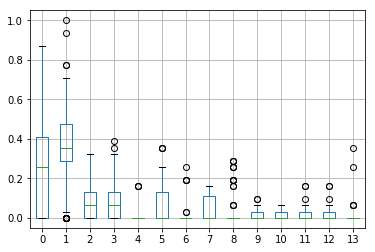

In [9]:
X_train_df.boxplot()

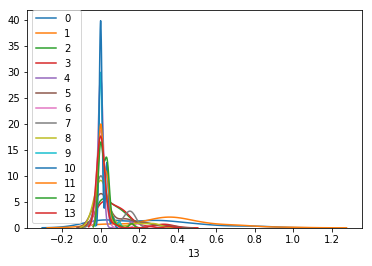

In [10]:
for i in X_train_df:
    sns.distplot(X_train_df[i], hist = False, label = i)

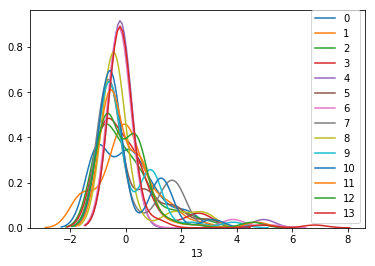

In [11]:
normalized_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()
normalized_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()
for i in normalized_X_train_df:
    sns.distplot(normalized_X_train_df[i], hist = False, label = i)

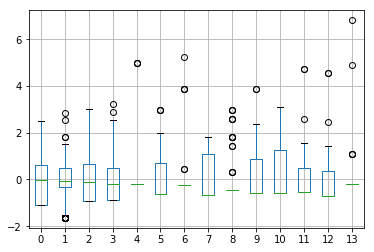

In [12]:
normalized_X_train_df.boxplot()

In [13]:
count = 1
cls = 1
Y_class = []
for i in range (104):
    if count == 4:
        count = 1
        cls +=1
    else:
        Y_class.append(cls)
        count += 1

Y_class_arr = np.asarray(Y_class)

In [14]:

# Parameters options
parameter_space = {'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.01, 0.1, 1], 'C': [0.001, 0.01, 0.1, 1, 10]}

# Cross-validation split
cv = StratifiedShuffleSplit(n_splits = 14, test_size=0.6, random_state = 1)

# Finding best parameters
clf = GridSearchCV(SVC(),parameter_space, cv = cv)
clf.fit(X_train_np, Y_class_arr)
print(clf.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [15]:
# Training model with new parameters
clf.fit(X_train_np, Y_class_arr)
y_pred = clf.predict(X_test_np)
y_test = Y_class_arr
print("New Training Score = ", clf.score(X_train_np, Y_class_arr))
print("New Testing Score = ", clf.score(X_test_np, Y_class_arr))
print ('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))

New Training Score =  0.9102564102564102
New Testing Score =  0.8333333333333334
Accuracy Score: 0.8333333333333334


Text(0.5,51,'Predicted label')

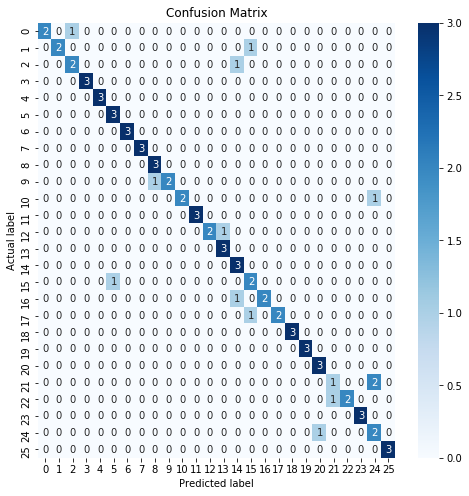

In [16]:
results = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(results, annot=True, fmt="d", cmap = 'Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.67      0.80         3
           2       1.00      0.67      0.80         3
           3       0.67      0.67      0.67         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       0.75      1.00      0.86         3
          10       1.00      0.67      0.80         3
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         3
          13       1.00      0.67      0.80         3
          14       0.75      1.00      0.86         3
          15       0.60      1.00      0.75         3
          16       0.50      0.67      0.57         3
          17       1.00      0.67      0.80         3
          18       1.00    